# Data Understanding

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

%matplotlib inline

## Load dataset

In [2]:
# load data from database
engine = create_engine('sqlite:////home/guilherme/Documents/Projetos/Udacity_Data_Science/Disaster-Response-Udacity/data/DisasterResponse.db')
df = pd.read_sql_table('DisasterResponse', engine)
df.head()
X = df[['message', 'original', 'genre']]
Y = df.iloc[:,4:]

## Frequency of each label

In [3]:
qtycategories = pd.Series(dtype=float)
for col in Y.columns:
    for index, value in enumerate(Y[col].value_counts().sort_index()):
        if index != 0:
            qtycategories[col + '_' + str(index)] = value/Y.shape[0]

The comparison of the set with the original set of labels is made to identify if there is a label without positive values.

In [4]:
check = set([value[:-2] for value in qtycategories.index])
check2 = set(Y.columns)

In [5]:
if len(check2 - check) > 0:
    for i in (check2 - check):
        qtycategories[i + '_1'] = 0

Plotting the graph

In [6]:
qtycategories.sort_values(ascending=False, inplace=True)

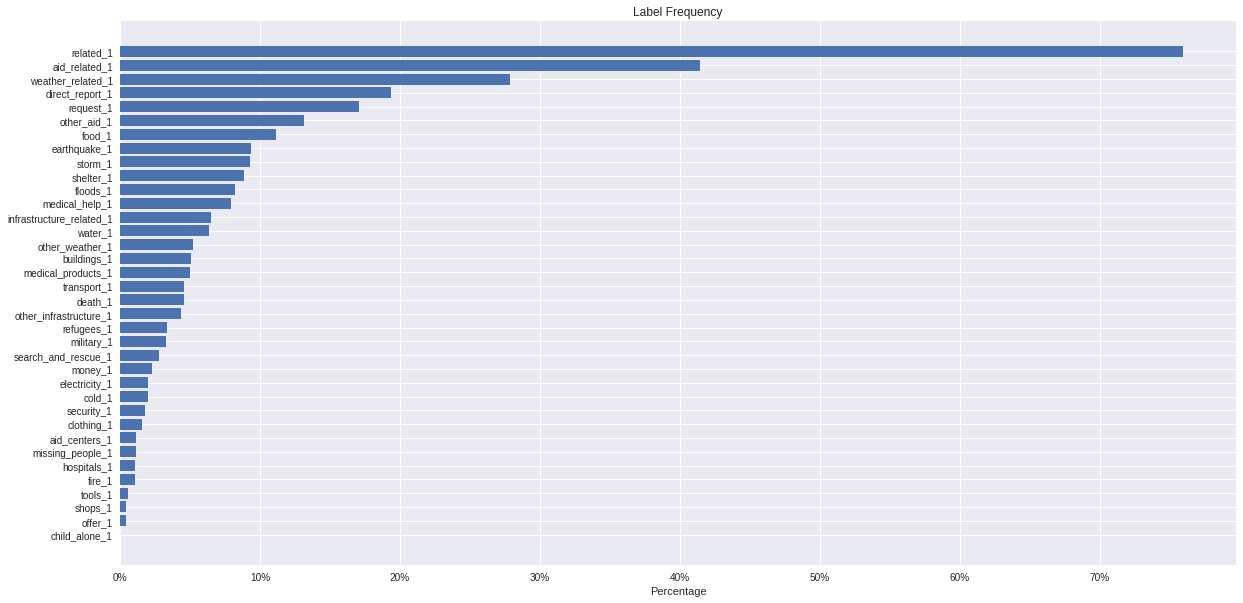

In [7]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(20, 10))
ax.barh(qtycategories.index, qtycategories.values*100)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Percentage')
ax.set_title('Label Frequency')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

## Quantity of labels per row

In [8]:
qtylabel = Y.apply(lambda x: np.sum(x>=1) , axis = 1).value_counts()

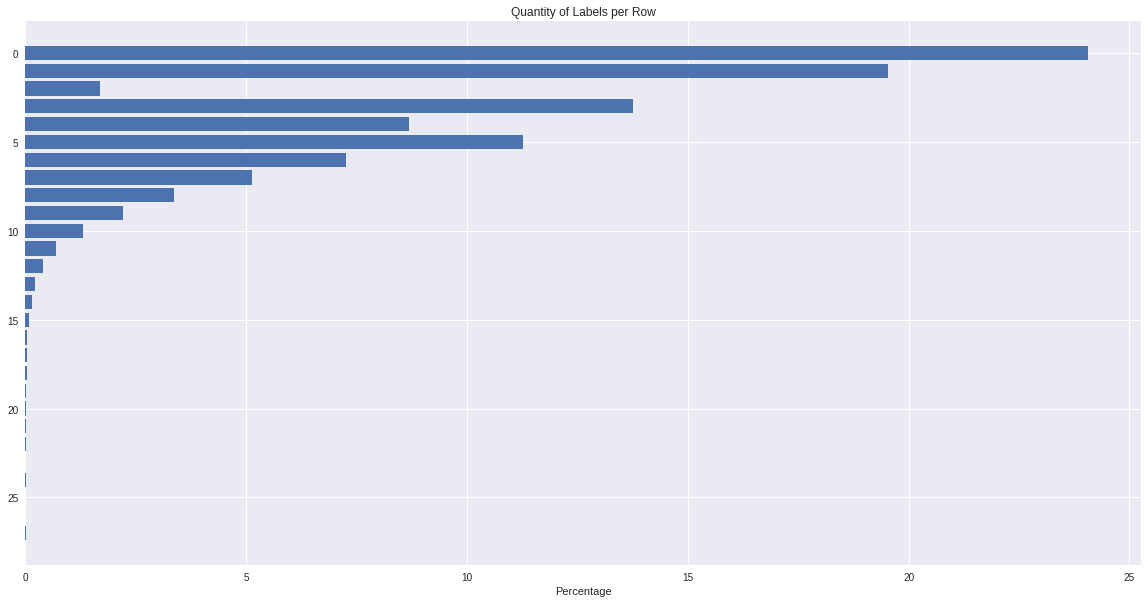

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.barh(qtylabel.index, qtylabel.values*100/Y.shape[0])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Percentage')
ax.set_title('Quantity of Labels per Row')
plt.style.use('ggplot')

## Distribution of Labels Quantity of each row per Labels category

In [10]:
Y["Qty_Labels"] = Y.apply(lambda x: np.sum(x>=1) , axis = 1)

In [11]:
df = pd.DataFrame()
for col in Y.columns[:-1]:
    countLabels = Y.groupby(by = [col, 'Qty_Labels']).count().iloc[:,0]
    labels = countLabels.index.get_level_values(0).drop_duplicates()
    for i in labels:
        if i == 0:
            nolabel = countLabels[i].sum()
        else:
            countLabels[(i, 0)] = nolabel
    countLabels.sort_index(inplace=True)
    countLabels.drop(labels=0, level=0, inplace=True)
    labels = countLabels.index.get_level_values(0).drop_duplicates()
    for i in labels:
        partial_df = pd.DataFrame(data=countLabels[i].values.astype(np.int64), index=countLabels[i].index, columns=[col + '_' + str(i)])
        df = pd.concat([df, partial_df], axis=1)
df.fillna(0, inplace=True) 

In [12]:
df = df.astype('int64')

Text(0.5, 1.0, 'Quantity of Labels X Label')

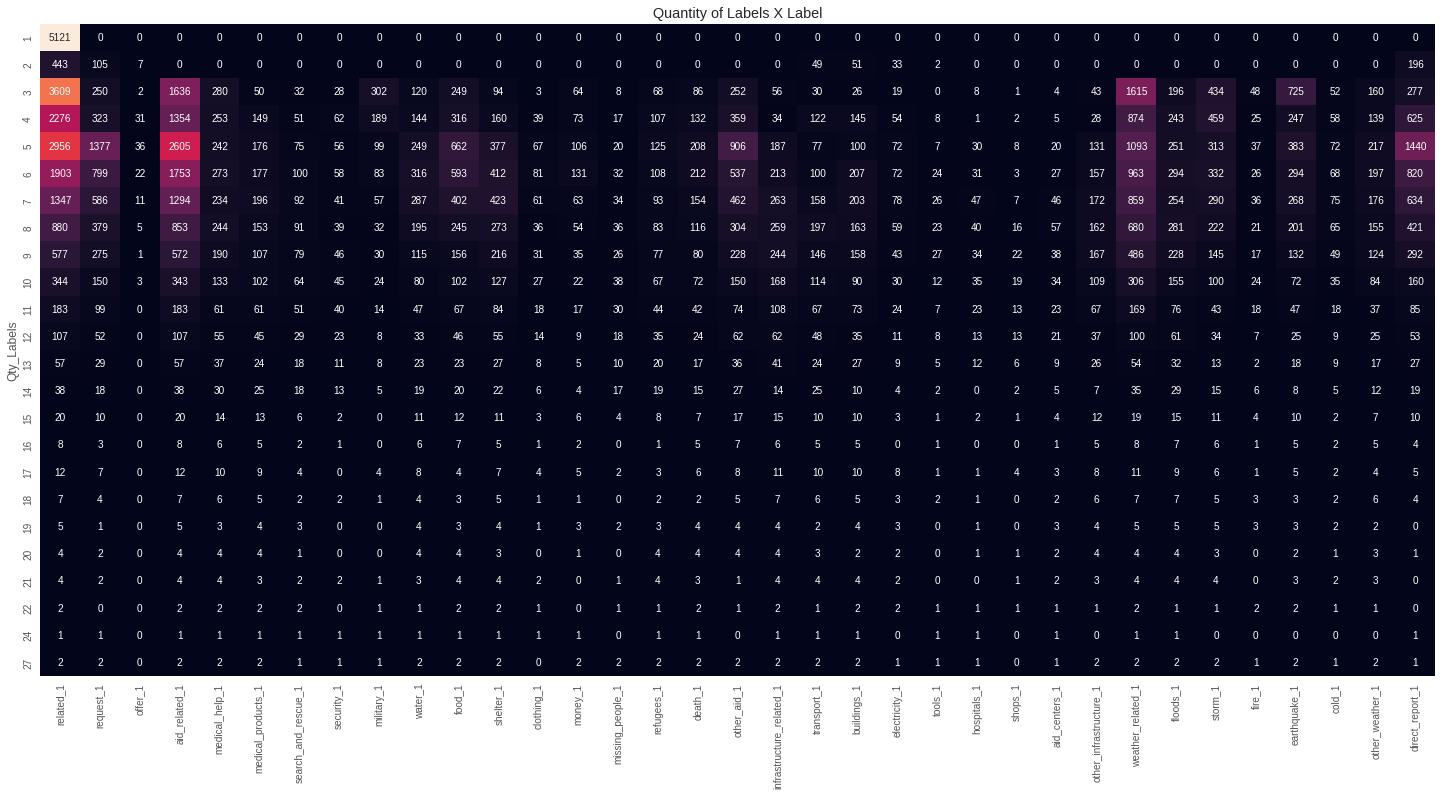

In [13]:
fig, ax = plt.subplots(figsize=(25, 12))
sns.heatmap(df.iloc[1:], annot=True, fmt='d', cbar = False)
ax.set_title('Quantity of Labels X Label')

In [14]:
Y

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report,Qty_Labels
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,5
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26213,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
26214,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3


## Conclusions

* Few labels categories have more far more distribution like *aid_related*, *weather_related* and *direct_report* than other categories like *shops*, *offer* and *child alone*. What can represented a chalenge to acquire a good performance in our model.
* We don't have much cases where *related* labels is applied with only one other label. This is also represent a challenge to balance the dataset, because if we choose a some rows to increase the quantity of small labels we can also increase the quantity of labels with higher frequency.
* **46%** of the rows have 3 to 7 labels.